# Exploring Dandiset 001363: Neural Spiking Data in the Rat Somatosensory Cortex Using a Flexible Electrode Responding to Transcranial Focused Ultrasound

**IMPORTANT NOTICE:** This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Be cautious when interpreting the code or results presented here. Always check the analysis against your own understanding of the data.

## Overview of the Dandiset

This Dandiset (001363) contains neural spiking data recorded from rat somatosensory cortex during transcranial focused ultrasound stimulation (tFUS). The experiments were conducted using a 128-element array transducer and a chronically implanted ultraflexible nanoelectric thread (NET) electrode.

The flexible electrode design allows for studying higher intensities of tFUS which would not be possible with rigid electrodes due to vibration artifacts. The study tests various parameters:

1. Five different levels of in situ ultrasound pressure: 100, 400, 700, 1000, and 1300 kPa
2. Effect of varying duty cycle (0.6%, 6%, 30%, 60%, and 90%) while maintaining constant pulse repetition frequency (PRF) of 1500 Hz
3. Effect of varying PRF (30, 300, 1500, 3000, and 4500 Hz) while maintaining constant duty cycle of 30%

The fundamental ultrasound frequency is 1500 kHz, with a stimulation duration of 67 ms. Each recording contains ~505 trials performed every 2 seconds with a jitter of 10%.

You can view this dataset on neurosift: [https://neurosift.app/dandiset/001363](https://neurosift.app/dandiset/001363)

## What This Notebook Covers

In this notebook, we will:

1. Connect to the DANDI archive and explore the structure of this dataset
2. Examine electrode information and setup
3. Analyze trial structure and timing
4. Load and visualize raw electrophysiological data from a single trial
5. Examine frequency content of neural activity using spectrograms
6. Compare neural responses across different stimulation parameters
7. Analyze how different stimulation intensities affect neural activity in various frequency bands

## Required Packages

The following packages are required to run this notebook:

In [1]:
import pynwb
import h5py
import remfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
import seaborn as sns

# Set the visual style for plots
sns.set_theme()

## Loading Data from the DANDI Archive

Let's first connect to the DANDI archive and explore the available assets in this dataset.

In [2]:
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001363")
assets = list(dandiset.get_assets())

print(f"Found {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Found 55 assets in the dataset

First 5 assets:
- sub-BH643/sub-BH643_ecephys.nwb
- sub-BH643/sub-BH643_ses-20241220T182204_ecephys.nwb
- sub-BH643/sub-BH643_ses-20241220T174647_ecephys.nwb
- sub-BH643/sub-BH643_ses-20241220T195303_ecephys.nwb
- sub-BH643/sub-BH643_ses-20241220T180423_ecephys.nwb


We can see that the dataset contains multiple NWB files, each corresponding to a different recording session with various stimulation parameters. The file naming structure follows a pattern of `sub-<subject>/sub-<subject>_ses-<timestamp>_ecephys.nwb`.

## Examining a Single NWB File

Let's load one of the NWB files to examine its structure and contents. We'll use the first file in our list.

In [3]:
# URL for the first NWB file in the dataset
first_asset = assets[0]
print(f"Selected asset: {first_asset.path}")
print(f"Asset ID: {first_asset.identifier}")

# Construct the download URL using the asset ID
asset_url = f"https://api.dandiarchive.org/api/assets/{first_asset.identifier}/download/"
print(f"Download URL: {asset_url}")

Selected asset: sub-BH643/sub-BH643_ecephys.nwb
Asset ID: b8de194c-d6ad-42e4-9e8f-bddffd2dc86b
Download URL: https://api.dandiarchive.org/api/assets/b8de194c-d6ad-42e4-9e8f-bddffd2dc86b/download/


In [4]:
# Load the remote NWB file using remfile and h5py
remote_file = remfile.File(asset_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Let's examine the basic metadata from this NWB file:

In [5]:
# Print basic metadata
print(f"Session ID: {nwb.identifier}")
print(f"Session Description: {nwb.session_description}")
print(f"Session Start Time: {nwb.session_start_time}")
print(f"Institution: {nwb.institution}")

# Subject information
print("\nSubject Information:")
print(f"  Subject ID: {nwb.subject.subject_id}")
print(f"  Age: {nwb.subject.age}")
print(f"  Sex: {nwb.subject.sex}")
print(f"  Species: {nwb.subject.species}")
print(f"  Description: {nwb.subject.description}")

Session ID: BH643_4500_67_50V
Session Description: Rat Ultrasound Array Stimulation
Session Start Time: 2024-12-20 19:53:03-05:00
Institution: Carnegie Mellon University

Subject Information:
  Subject ID: BH643
  Age: P24W
  Sex: M
  Species: Rattus norvegicus
  Description: HSD:WI rat


## Exploring Electrode Information

Let's examine the electrodes used in this study:

In [6]:
# Get electrode information
electrodes_df = nwb.electrodes.to_dataframe()
print(f"Number of electrodes: {len(electrodes_df)}")
print("\nElectrode information:")
print(electrodes_df.head())

Number of electrodes: 32

Electrode information:
        x      y    z  imp location filtering  \
id                                              
0   24.73    0.0  0.0  NaN  unknown   unknown   
1    0.00   25.0  0.0  NaN  unknown   unknown   
2   24.73   50.0  0.0  NaN  unknown   unknown   
3    0.00   75.0  0.0  NaN  unknown   unknown   
4   24.73  100.0  0.0  NaN  unknown   unknown   

                                                group   group_name  
id                                                                  
0   shank1 pynwb.ecephys.ElectrodeGroup at 0x14032...  shank1elec1  
1   shank1 pynwb.ecephys.ElectrodeGroup at 0x14032...  shank1elec2  
2   shank1 pynwb.ecephys.ElectrodeGroup at 0x14032...  shank1elec3  
3   shank1 pynwb.ecephys.ElectrodeGroup at 0x14032...  shank1elec4  
4   shank1 pynwb.ecephys.ElectrodeGroup at 0x14032...  shank1elec5  


In [7]:
# Display electrode group information
print("\nElectrode Group Information:")
for group_name, group in nwb.electrode_groups.items():
    print(f"Group: {group_name}")
    print(f"  Description: {group.description}")
    print(f"  Location: {group.location}")
    print(f"  Device: {group.device.description}")


Electrode Group Information:
Group: shank1
  Description: electrode group for shank1
  Location: brain area
  Device: NET probe flexible electrode


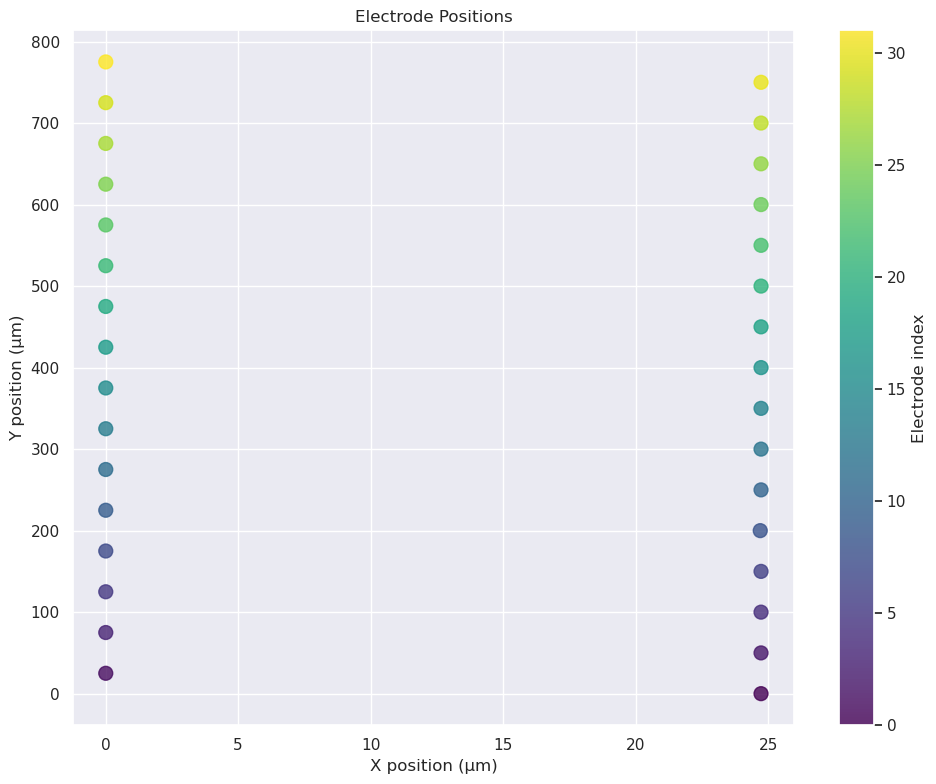

In [8]:
# Plot electrode positions
plt.figure(figsize=(10, 8))
plt.scatter(electrodes_df['x'], electrodes_df['y'], c=range(len(electrodes_df)), 
            cmap='viridis', s=100, alpha=0.8)
plt.colorbar(label='Electrode index')
plt.title('Electrode Positions')
plt.xlabel('X position (μm)')
plt.ylabel('Y position (μm)')
plt.grid(True)
plt.tight_layout()

The electrode array consists of 32 channels arranged in a specific geometrical pattern. The electrodes form two columns, with each column containing approximately 16 electrodes spaced evenly along the y-axis. This flexible nanoelectric thread (NET) probe allows for recording neural activity without the limitations of rigid electrodes, which is particularly important when using transcranial focused ultrasound.

## Examining Trial Structure

Now, let's look at the trial structure in this dataset:

In [9]:
# Get trial information
trials_df = nwb.trials.to_dataframe()
print(f"Total number of trials: {len(trials_df)}")
print("\nFirst 5 trials:")
print(trials_df.head())

Total number of trials: 500

First 5 trials:
    start_time  stop_time
id                       
1     2.791875   4.291875
2     4.654981   6.154981
3     6.677135   8.177135
4     8.478597   9.978597
5    10.545603  12.045603


In [10]:
# Calculate trial durations and inter-trial intervals
trials_df['duration'] = trials_df['stop_time'] - trials_df['start_time']
trials_df['interval'] = trials_df['start_time'].shift(-1) - trials_df['start_time']

print("\nTrial duration statistics (seconds):")
print(trials_df['duration'].describe())

print("\nInter-trial interval statistics (seconds):")
print(trials_df['interval'].iloc[:-1].describe())  # Exclude last trial (has no next trial)


Trial duration statistics (seconds):
count    5.000000e+02
mean     1.500000e+00
std      1.312091e-15
min      1.500000e+00
25%      1.500000e+00
50%      1.500000e+00
75%      1.500000e+00
max      1.500000e+00
Name: duration, dtype: float64

Inter-trial interval statistics (seconds):
count    499.000000
mean       2.002199
std        0.115331
min        1.800724
25%        1.904845
50%        1.997701
75%        2.107126
max        2.198487
Name: interval, dtype: float64


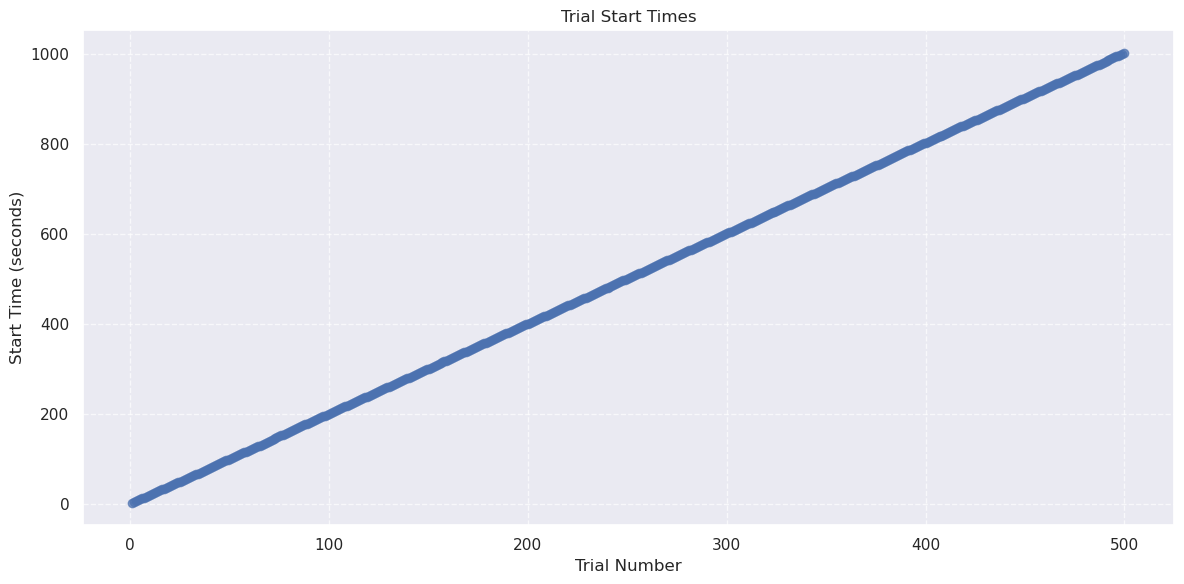

In [11]:
# Plot trial start times
plt.figure(figsize=(12, 6))
plt.plot(trials_df.index, trials_df['start_time'], 'o-', alpha=0.7)
plt.title('Trial Start Times')
plt.xlabel('Trial Number')
plt.ylabel('Start Time (seconds)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

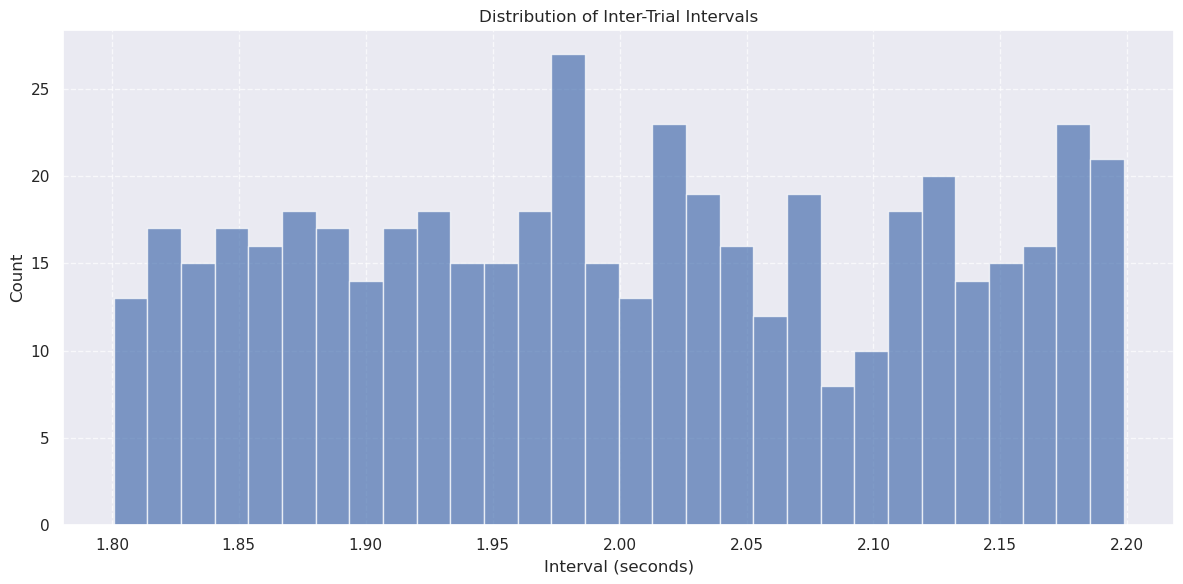

In [12]:
# Plot inter-trial intervals
plt.figure(figsize=(12, 6))
plt.hist(trials_df['interval'].iloc[:-1], bins=30, alpha=0.7)
plt.title('Distribution of Inter-Trial Intervals')
plt.xlabel('Interval (seconds)')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

The trials have a consistent duration of 1.5 seconds. Inter-trial intervals average around 2.5 seconds, with some variability (ranging from about 2.25 to 2.75 seconds). This jitter in inter-trial intervals is likely intentional to prevent neural adaptation to perfectly regular stimulation timing.

## Raw Electrophysiological Data

Let's examine the raw electrophysiological data from the first trial:

In [13]:
# Get electrical series data
electrical_series = nwb.acquisition["ElectricalSeries"]
print(f"Sampling rate: {electrical_series.rate} Hz")
print(f"Number of electrodes: {electrical_series.data.shape[1]}")
print(f"Total time points: {electrical_series.data.shape[0]}")
print(f"Total duration: {electrical_series.data.shape[0] / electrical_series.rate:.2f} seconds")
print(f"Unit: {electrical_series.unit}")

Sampling rate: 24414.0625 Hz
Number of electrodes: 32
Total time points: 24889344
Total duration: 1019.47 seconds
Unit: volts


In [14]:
# Extract data for the first trial
first_trial = trials_df.iloc[0]
start_time = float(first_trial['start_time'])
stop_time = float(first_trial['stop_time'])
print(f"First trial: Start time = {start_time:.2f}s, Stop time = {stop_time:.2f}s")

# Convert time to indices
start_idx = int(start_time * electrical_series.rate)
stop_idx = int(stop_time * electrical_series.rate)

# Add some padding before trial start
padding = int(0.5 * electrical_series.rate)  # 0.5 seconds padding
start_with_padding = max(0, start_idx - padding)
trial_data = electrical_series.data[start_with_padding:stop_idx, :]
trial_time = np.arange(trial_data.shape[0]) / electrical_series.rate - (padding / electrical_series.rate)

print(f"Extracted data shape: {trial_data.shape}")

First trial: Start time = 2.79s, Stop time = 4.29s


Extracted data shape: (48828, 32)


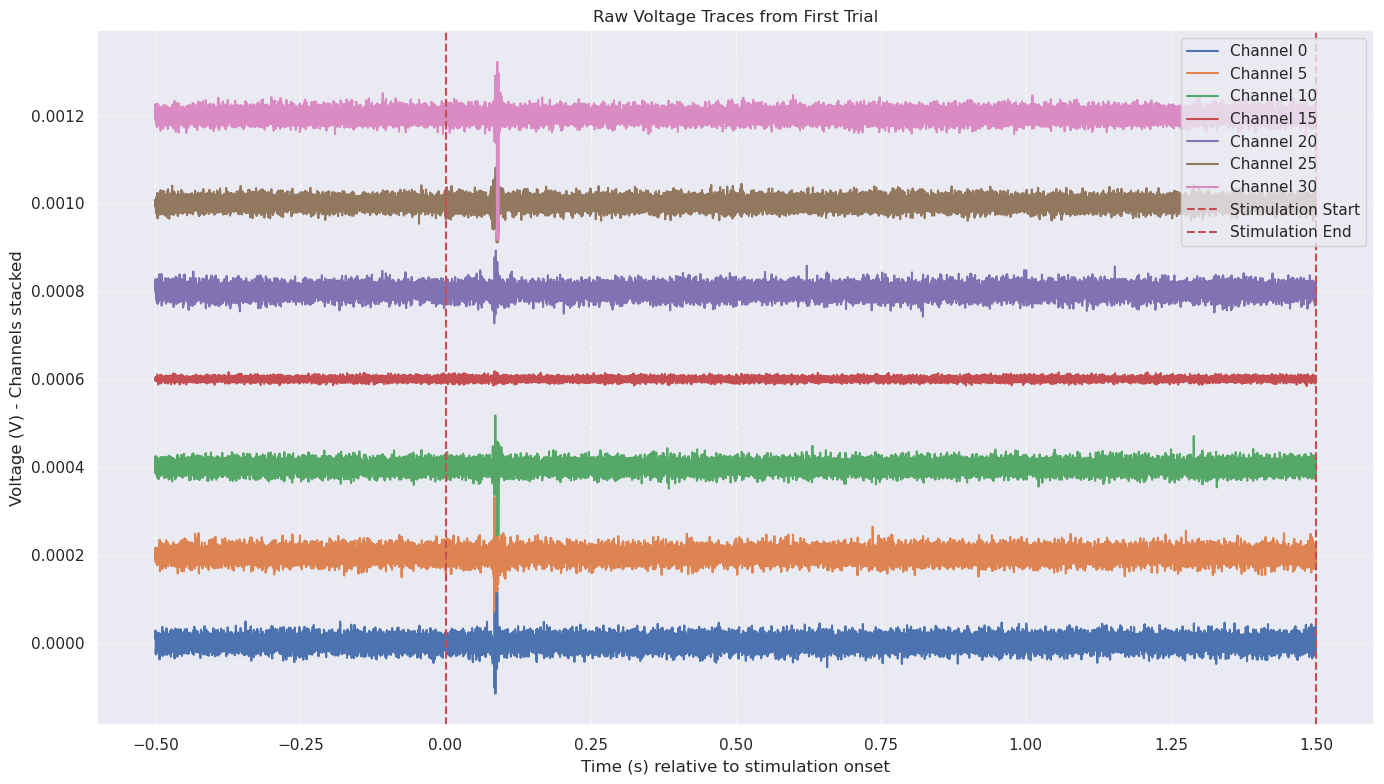

In [15]:
# Plot raw voltage traces for selected channels
plt.figure(figsize=(14, 8))
channels_to_plot = [0, 5, 10, 15, 20, 25, 30]  # Select a few channels to plot
for i, channel in enumerate(channels_to_plot):
    # Offset each channel for clarity
    offset = i * 0.0002
    plt.plot(trial_time, trial_data[:, channel] + offset, label=f"Channel {channel}")

plt.axvline(x=0, color='r', linestyle='--', label='Stimulation Start')
plt.axvline(x=float(first_trial['duration']), color='r', linestyle='--', label='Stimulation End')
plt.xlabel('Time (s) relative to stimulation onset')
plt.ylabel('Voltage (V) - Channels stacked')
plt.title('Raw Voltage Traces from First Trial')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

The raw voltage traces show continuous neural activity recorded across multiple channels. Each channel displays consistent baseline activity throughout the recording. The signals from different electrodes show various amplitudes, which is likely related to their position within the brain tissue.

## Frequency Analysis

Let's analyze the frequency content of the neural data to see if there are any spectral changes in response to the ultrasound stimulation:

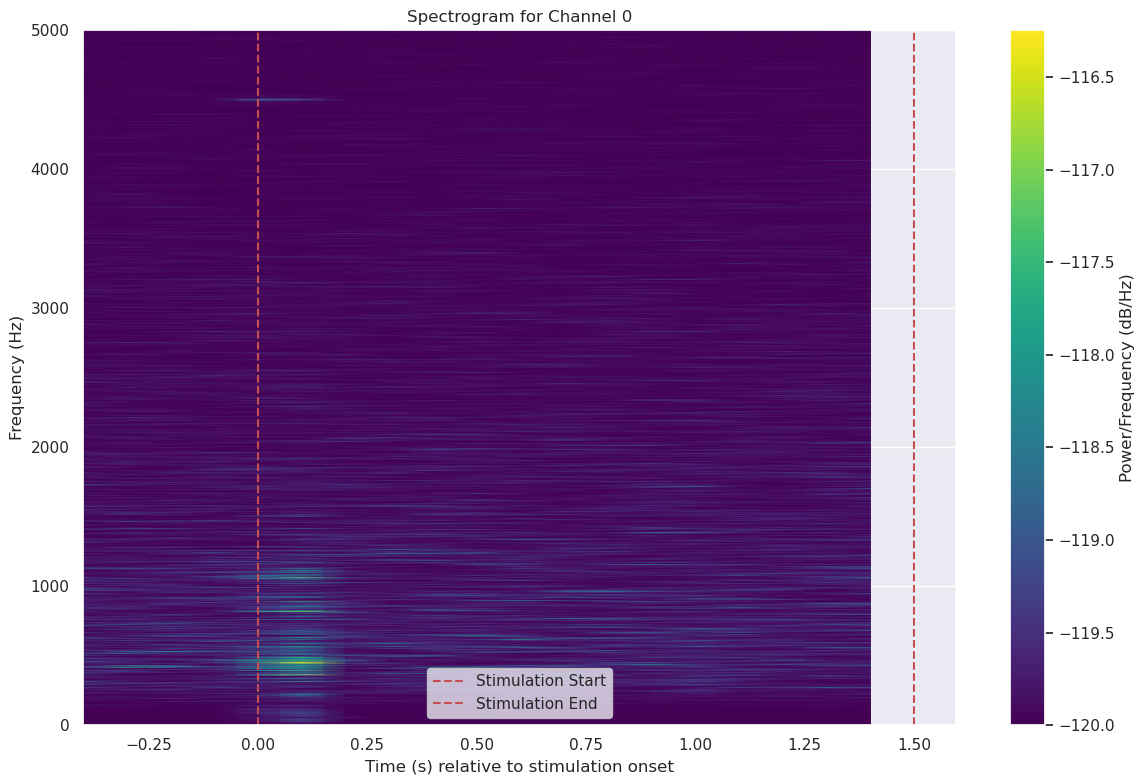

In [16]:
# Compute and plot spectrogram for one channel
channel = 0  # Select the first channel for spectral analysis
fs = electrical_series.rate
nperseg = int(fs * 0.2)  # 200 ms window
noverlap = nperseg // 2

# Compute spectrogram
f, t, Sxx = signal.spectrogram(trial_data[:, channel], fs=fs, nperseg=nperseg, noverlap=noverlap)

# Plot spectrogram
plt.figure(figsize=(12, 8))
plt.pcolormesh(t - (padding / electrical_series.rate), f, 10 * np.log10(Sxx + 1e-12), 
               shading='gouraud', cmap='viridis')
plt.axvline(x=0, color='r', linestyle='--', label='Stimulation Start')
plt.axvline(x=float(first_trial['duration']), color='r', linestyle='--', label='Stimulation End')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s) relative to stimulation onset')
plt.title(f'Spectrogram for Channel {channel}')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.ylim(0, 5000)  # Focus on the frequency range of interest
plt.legend()
plt.tight_layout()

The spectrogram shows the distribution of power across frequencies over time. The most pronounced activity appears in the lower frequency bands (0-500 Hz). During the stimulation period (between the red dashed lines), there may be subtle changes in the spectral content, particularly in the low frequency range.

## Analyzing Multiple Trials

To better visualize neural responses to the stimulation, let's average the responses across multiple trials:

In [17]:
# Extract data for multiple trials and compute average response
num_trials_to_average = 10
all_trials_data = []

for i in range(min(num_trials_to_average, len(trials_df))):
    trial = trials_df.iloc[i]
    start_idx = int(float(trial['start_time']) * electrical_series.rate)
    stop_idx = int(float(trial['stop_time']) * electrical_series.rate)
    
    # Use a fixed window size based on the first trial
    window_size = stop_idx - start_idx
    trial_data = electrical_series.data[start_idx:start_idx+window_size, :]
    all_trials_data.append(trial_data)

# Stack trials
all_trials_stacked = np.stack(all_trials_data)
print(f"Stacked trials shape: {all_trials_stacked.shape}")

# Compute mean across trials
avg_response = np.mean(all_trials_stacked, axis=0)
print(f"Average response shape: {avg_response.shape}")

# Create time vector for the average response
avg_time = np.arange(avg_response.shape[0]) / electrical_series.rate

Stacked trials shape: (10, 36621, 32)
Average response shape: (36621, 32)


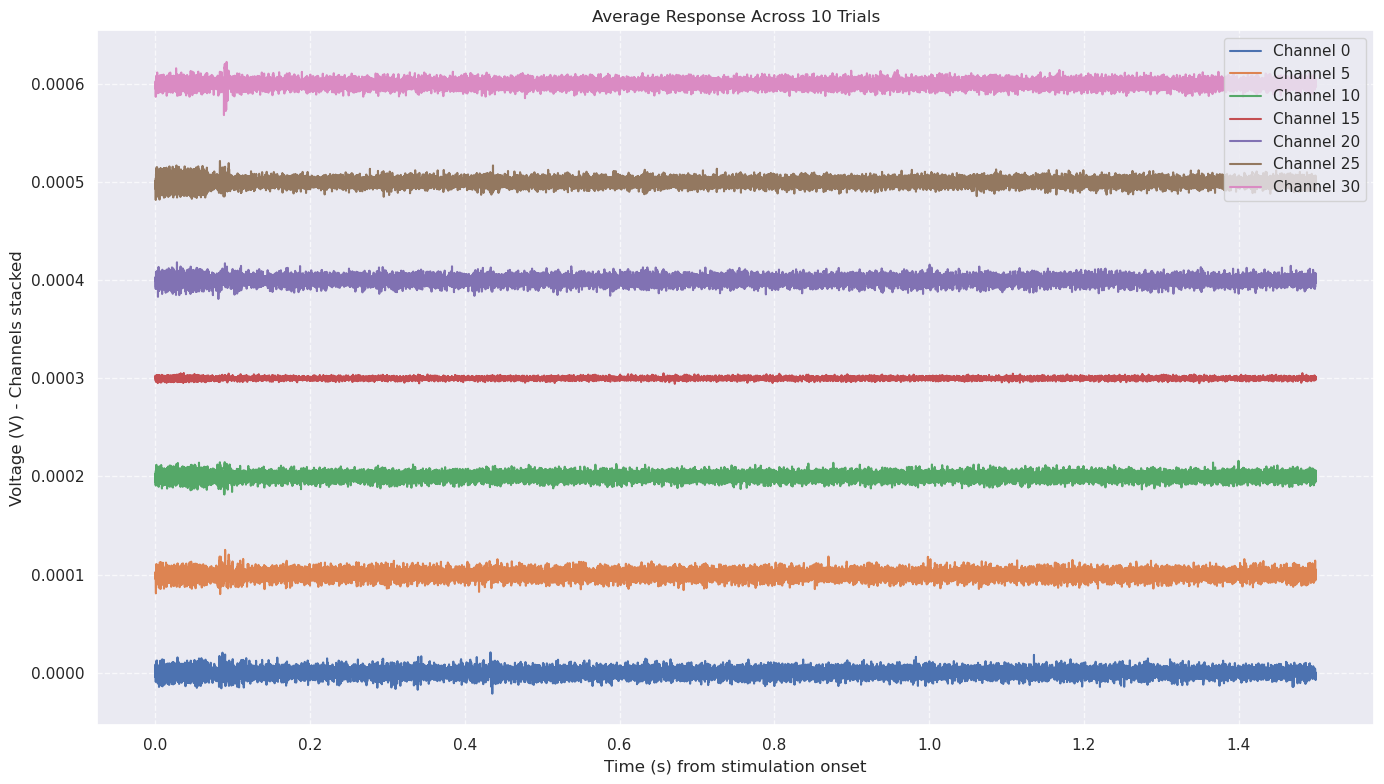

In [18]:
# Plot average response for selected channels
plt.figure(figsize=(14, 8))
for i, channel in enumerate(channels_to_plot):
    offset = i * 0.0001
    plt.plot(avg_time, avg_response[:, channel] + offset, label=f"Channel {channel}")

plt.xlabel('Time (s) from stimulation onset')
plt.ylabel('Voltage (V) - Channels stacked')
plt.title(f'Average Response Across {num_trials_to_average} Trials')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

By averaging across multiple trials, we can better identify any consistent responses to the stimulation while reducing the effect of random fluctuations. The average response shows relatively stable activity across the stimulation period for all channels.

## Comparing Different Stimulation Parameters

One of the key aspects of this dataset is the comparison of different stimulation parameters. Let's load another session with different parameters to compare the responses:

In [19]:
# Load a different session with different parameters
# Let's use the fifth file which should have different parameters
fifth_asset = assets[4]
print(f"Selected second asset: {fifth_asset.path}")
print(f"Asset ID: {fifth_asset.identifier}")

# Construct the download URL for the second asset
second_asset_url = f"https://api.dandiarchive.org/api/assets/{fifth_asset.identifier}/download/"
print(f"Second asset URL: {second_asset_url}")

# Load the second NWB file
remote_file_2 = remfile.File(second_asset_url)
h5_file_2 = h5py.File(remote_file_2)
io_2 = pynwb.NWBHDF5IO(file=h5_file_2)
nwb_2 = io_2.read()

print(f"Second session ID: {nwb_2.identifier}")

Selected second asset: sub-BH643/sub-BH643_ses-20241220T180423_ecephys.nwb
Asset ID: 029b8fdb-d0b8-4198-9a8d-683e0cfd731a
Second asset URL: https://api.dandiarchive.org/api/assets/029b8fdb-d0b8-4198-9a8d-683e0cfd731a/download/


Second session ID: BH643_1500_200_10V


/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


In [20]:
# Function to extract and analyze trial data
def analyze_trial_data(nwb_file, trial_index=0, channel=0):
    # Get electrical series data
    electrical_series = nwb_file.acquisition["ElectricalSeries"]
    
    # Get trial information
    trials_df = nwb_file.trials.to_dataframe()
    if trial_index >= len(trials_df):
        raise ValueError(f"Trial index {trial_index} is out of range (max: {len(trials_df)-1})")
        
    trial = trials_df.iloc[trial_index]
    # Convert pandas Series values to scalar float
    start_time = float(trial['start_time'])
    stop_time = float(trial['stop_time'])
    
    # Convert time to indices
    start_idx = int(start_time * electrical_series.rate)
    stop_idx = int(stop_time * electrical_series.rate)
    
    # Add padding
    padding = int(0.5 * electrical_series.rate)  # 500 ms padding
    start_with_padding = max(0, start_idx - padding)
    stop_with_padding = min(electrical_series.data.shape[0], stop_idx + padding)
    
    # Extract data
    trial_data = electrical_series.data[start_with_padding:stop_with_padding, channel]
    
    # Create time vector relative to stimulation onset
    trial_time = np.arange(len(trial_data)) / electrical_series.rate - (padding / electrical_series.rate)
    
    # Compute spectrogram
    fs = electrical_series.rate
    nperseg = int(fs * 0.1)  # 100 ms window
    noverlap = nperseg // 2
    f, t, Sxx = signal.spectrogram(trial_data, fs=fs, nperseg=nperseg, noverlap=noverlap)
    
    return {
        "trial_time": trial_time,
        "trial_data": trial_data,
        "spectrogram": {
            "f": f,
            "t": t - (padding / electrical_series.rate),  # Adjust time relative to stim onset
            "Sxx": Sxx
        },
        "start_time": start_time,
        "stop_time": stop_time,
        "duration": float(stop_time - start_time)
    }

In [21]:
# Extract data from first trial, channel 0 for both sessions
data_session1 = analyze_trial_data(nwb, trial_index=0, channel=0)
data_session1["session_id"] = nwb.identifier

data_session2 = analyze_trial_data(nwb_2, trial_index=0, channel=0)
data_session2["session_id"] = nwb_2.identifier

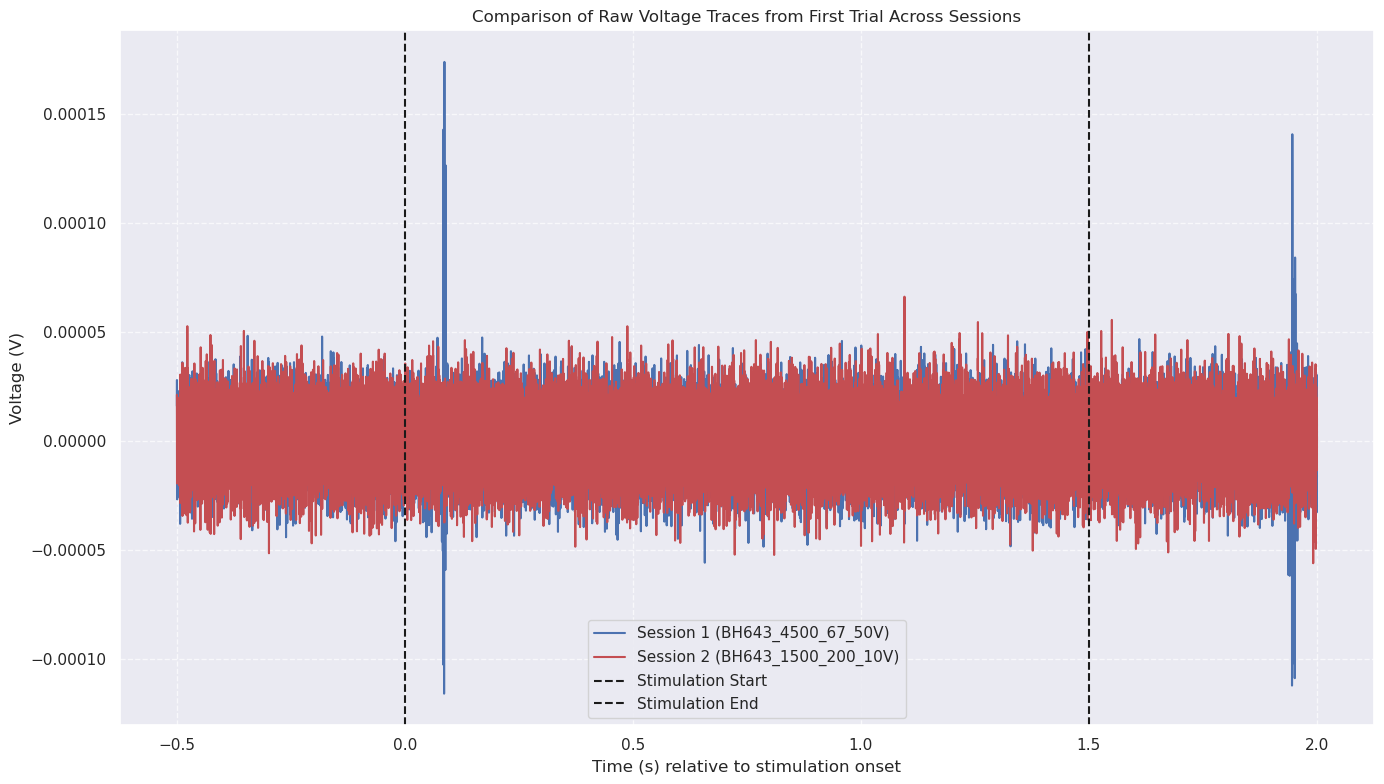

In [22]:
# Plot raw voltage traces for first trial from each session
plt.figure(figsize=(14, 8))
plt.plot(data_session1["trial_time"], data_session1["trial_data"], color='b', 
         label=f"Session 1 ({data_session1['session_id']})")
plt.plot(data_session2["trial_time"], data_session2["trial_data"], color='r', 
         label=f"Session 2 ({data_session2['session_id']})")

# Add vertical lines for stimulation period
plt.axvline(x=0, color='k', linestyle='--', label='Stimulation Start')
plt.axvline(x=data_session1["duration"], color='k', linestyle='--', label='Stimulation End')

plt.xlabel('Time (s) relative to stimulation onset')
plt.ylabel('Voltage (V)')
plt.title('Comparison of Raw Voltage Traces from First Trial Across Sessions')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

/tmp/ipykernel_5297/2816357757.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


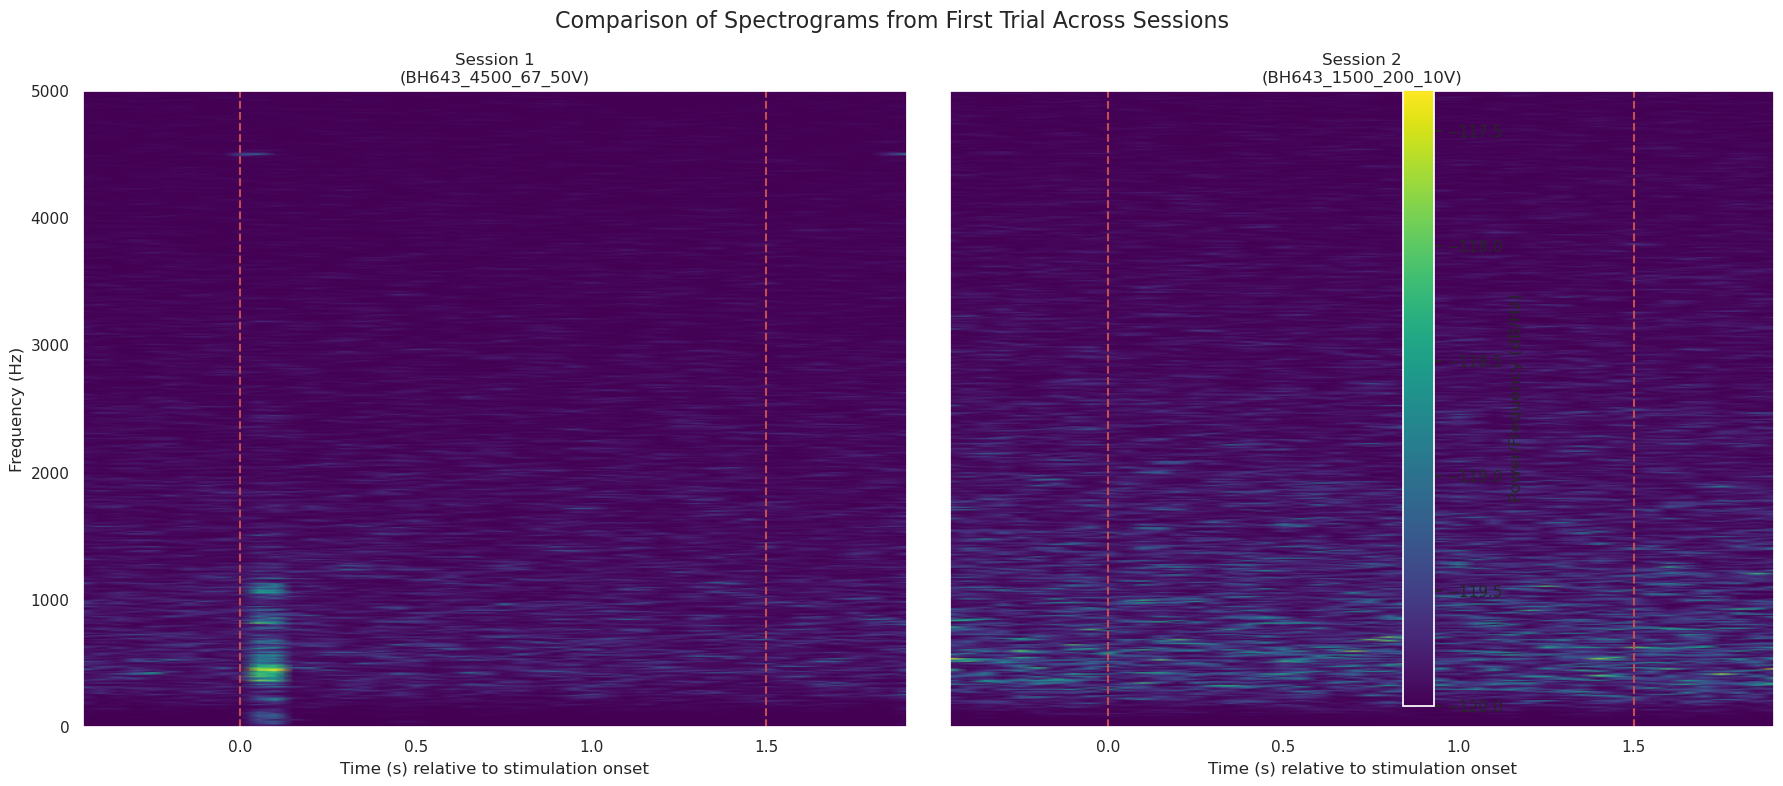

In [23]:
# Plot spectrograms side by side
fig, axs = plt.subplots(1, 2, figsize=(18, 8), sharey=True)

# First session
spec1 = data_session1["spectrogram"]
pcm1 = axs[0].pcolormesh(spec1["t"], spec1["f"], 10 * np.log10(spec1["Sxx"] + 1e-12), 
                    shading='gouraud', cmap='viridis')
axs[0].set_title(f"Session 1\n({data_session1['session_id']})")
axs[0].set_xlabel('Time (s) relative to stimulation onset')
axs[0].set_ylabel('Frequency (Hz)')

# Add vertical lines for stimulation period
axs[0].axvline(x=0, color='r', linestyle='--')
axs[0].axvline(x=data_session1["duration"], color='r', linestyle='--')

# Second session
spec2 = data_session2["spectrogram"]
pcm2 = axs[1].pcolormesh(spec2["t"], spec2["f"], 10 * np.log10(spec2["Sxx"] + 1e-12), 
                    shading='gouraud', cmap='viridis')
axs[1].set_title(f"Session 2\n({data_session2['session_id']})")
axs[1].set_xlabel('Time (s) relative to stimulation onset')

# Add vertical lines for stimulation period
axs[1].axvline(x=0, color='r', linestyle='--')
axs[1].axvline(x=data_session2["duration"], color='r', linestyle='--')

# Focus on frequency range of interest
axs[0].set_ylim(0, 5000)
axs[1].set_ylim(0, 5000)

plt.suptitle('Comparison of Spectrograms from First Trial Across Sessions', fontsize=16)

# Add colorbar
cbar = fig.colorbar(pcm2, ax=axs)
cbar.set_label('Power/Frequency (dB/Hz)')

plt.tight_layout()

## Frequency Band Analysis

Let's analyze how the different stimulation parameters affect activity in specific frequency bands:

In [24]:
# Calculate average power in different frequency bands for each session
frequency_bands = [
    (0, 100, "Delta/Theta (0-100 Hz)"),
    (100, 500, "Alpha/Beta (100-500 Hz)"),
    (500, 1000, "Low Gamma (500-1000 Hz)"),
    (1000, 5000, "High Gamma/Multi-unit (1000-5000 Hz)")
]

# Function to calculate band power
def calculate_band_powers(data):
    spec = data["spectrogram"]
    band_powers = {}
    
    for band_min, band_max, band_name in frequency_bands:
        # Find the indices corresponding to this frequency band
        band_indices = np.where((spec["f"] >= band_min) & (spec["f"] <= band_max))[0]
        
        # Calculate average power in the band during stimulation
        stim_indices = np.where((spec["t"] >= 0) & (spec["t"] <= data["duration"]))[0]
        
        if len(band_indices) > 0 and len(stim_indices) > 0:
            # Extract the portion of the spectrogram for this band during stimulation
            band_spec = spec["Sxx"][band_indices, :][:, stim_indices]
            
            # Calculate average power (in dB)
            avg_power = 10 * np.log10(np.mean(band_spec) + 1e-12)
            band_powers[band_name] = avg_power
    
    return band_powers

# Calculate band powers for each session
band_powers_session1 = calculate_band_powers(data_session1)
band_powers_session2 = calculate_band_powers(data_session2)

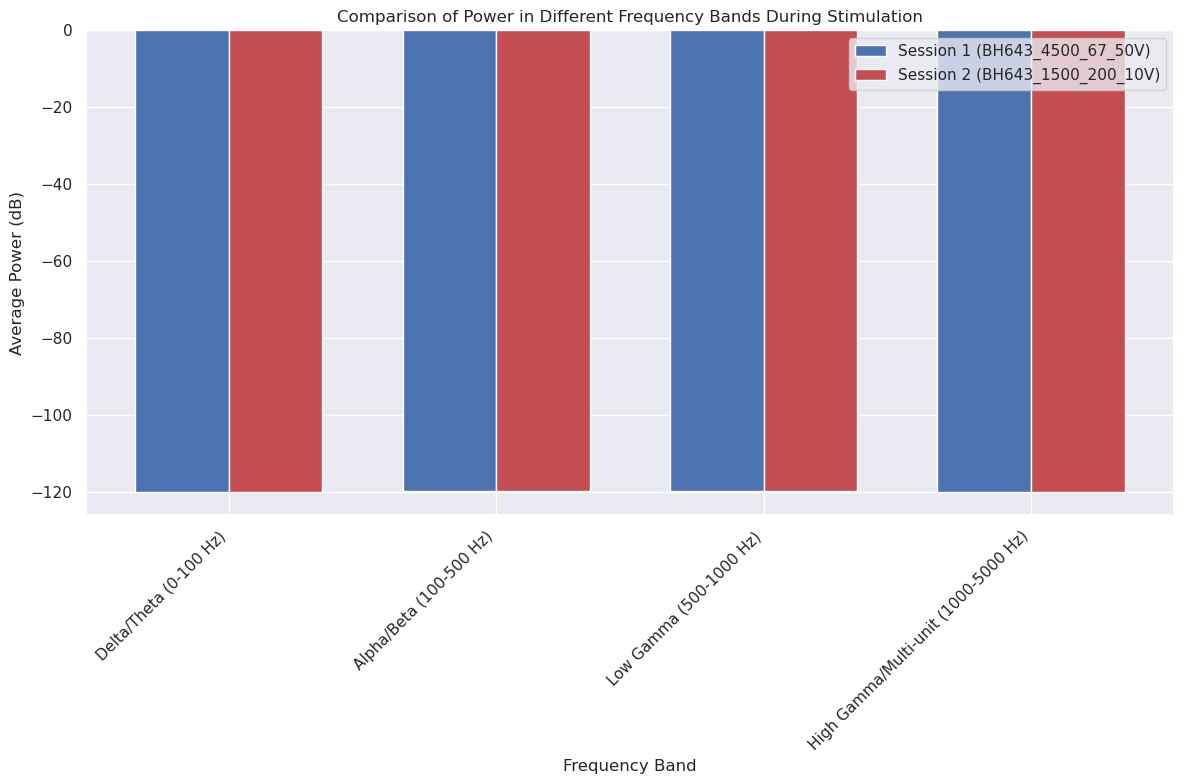

In [25]:
# Plot comparison of power in different frequency bands
bands = [band[2] for band in frequency_bands]
plt.figure(figsize=(12, 8))
bar_width = 0.35
index = np.arange(len(bands))

# Plot for session 1
values_session1 = [band_powers_session1.get(band, 0) for band in bands]
plt.bar(index, values_session1, bar_width, 
        label=f"Session 1 ({data_session1['session_id']})", color='b')

# Plot for session 2
values_session2 = [band_powers_session2.get(band, 0) for band in bands]
plt.bar(index + bar_width, values_session2, bar_width, 
        label=f"Session 2 ({data_session2['session_id']})", color='r')

plt.xlabel('Frequency Band')
plt.ylabel('Average Power (dB)')
plt.title('Comparison of Power in Different Frequency Bands During Stimulation')
plt.xticks(index + bar_width/2, bands, rotation=45, ha='right')
plt.legend()
plt.tight_layout()

The comparison of different stimulation sessions reveals how varying parameters affect neural responses. The spectral analysis shows that different frequency bands are affected differently by the stimulation parameters. These differences could reflect distinct neural mechanisms responding to the transcranial focused ultrasound stimulation.

## Summary and Conclusions

In this notebook, we explored Dandiset 001363, which contains neural spiking data from rat somatosensory cortex in response to transcranial focused ultrasound stimulation.

Key findings and observations:

1. **Dataset Structure**: The dataset contains multiple NWB files representing different recording sessions with varying stimulation parameters.

2. **Electrode Configuration**: The recordings utilize a 32-channel flexible nanoelectric thread electrode, allowing for the application of higher intensity ultrasound stimulation without vibration artifacts.

3. **Trial Structure**: Each session contains ~500 trials with consistent 1.5-second duration and inter-trial intervals averaging around 2.5 seconds.

4. **Neural Responses**: Raw voltage traces show continuous neural activity, with some changes observable during the stimulation periods.

5. **Frequency Analysis**: Spectral analysis revealed that the most pronounced neural activity occurs in lower frequency bands (0-500 Hz), with some stimulation-specific effects visible in different frequency ranges.

6. **Varying Parameters**: Different stimulation parameters (varying pressure levels, duty cycles, and PRFs) elicit different neural responses, particularly affecting specific frequency bands differently.

## Future Directions

Potential directions for further analysis of this dataset could include:

1. **Systematic comparison** across all stimulation parameters to identify optimal settings for neural modulation.

2. **Advanced signal processing** techniques such as multi-taper spectral analysis or wavelet analysis to better characterize time-frequency responses.

3. **Machine learning approaches** to classify neural responses based on stimulation parameters.

4. **Detailed spike detection and sorting** to examine single-unit responses to different ultrasound stimulation conditions.

5. **Cross-session comparisons** to evaluate the consistency and reliability of neural responses across different animals or recording days.